<a href="https://colab.research.google.com/github/thnosthanos/Geeksman_AISquad_Project1_ShubhamBansal/blob/master/Trainingmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Now,we are into our second Notebook.In this notebook,we will download our dataset which we have uploaded on our kaggle Id in our first Notebook and then by using that dataset we will train our ML model ,the resnet 50 and save our model so that we  can use it in our third notebook to make predictions on random Images.

These 8 lines are very Important lines which will be included in almost every notebook.The autoreload function ensures every image and graph is loaded in the samenotebook in which are working,the matplotlib is used to plot graph,the filterwarning method ignore any unnecessary warnings.Now this fastai library is like god for us since it provides us with so much in-built methods and functions for some very important task which we want to do in our Project.Without this fastai library we have to write our own custom code for those task which will span numerous lines but with the help of fastai ,we can do that same task in just a single line.

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
from fastai.vision import *
from fastai.metrics import error_rate

Uploading our kaggle.json file


In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


Extracting our credentials and setting it in our kaggle environment variables.

In [ ]:
import pandas as pd
import os
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

Downloading dataset from the location where we uploaded it in our first notebook.

In [ ]:
!kaggle datasets download -d shubhambansal5454/Vehicle

 71% 18.0M/25.5M [00:00<00:00, 35.3MB/s]
100% 25.5M/25.5M [00:00<00:00, 52.0MB/s]


The data in our dataset was uploaded in zip format so unzipping all the files so that we can use the data.

In [ ]:
!unzip "*.zip"

Archive:  Vehicle.zip
  inflating: My_data/bike/00000000.jpg  
  inflating: My_data/bike/00000001.jpg  
  inflating: My_data/bike/00000002.jpg  
  inflating: My_data/bike/00000003.jpg  
  inflating: My_data/bike/00000004.jpg  
  inflating: My_data/bike/00000005.jpg  
  inflating: My_data/bike/00000006.jpg  
  inflating: My_data/bike/00000007.jpg  
  inflating: My_data/bike/00000008.jpg  
  inflating: My_data/bike/00000009.jpg  
  inflating: My_data/bike/00000010.jpg  
  inflating: My_data/bike/00000011.jpg  
  inflating: My_data/bike/00000012.jpg  
  inflating: My_data/bike/00000013.jpg  
  inflating: My_data/bike/00000014.jpg  
  inflating: My_data/bike/00000015.jpg  
  inflating: My_data/bike/00000016.jpg  
  inflating: My_data/bike/00000017.jpg  
  inflating: My_data/bike/00000018.jpg  
  inflating: My_data/bike/00000019.jpg  
  inflating: My_data/bike/00000020.jpg  
  inflating: My_data/bike/00000021.jpg  
  inflating: My_data/bike/00000022.jpg  
  inflating: My_data/bike/00000023.

This command will generate a random dataset which will be used as the testing dataset for our ML model.So,a question can arise(if you have a bit experience with python programming language) that without importing numpy python module,how are we able to use it here.Well this is the magic of fastai library.The fastai library has in built numpy module and since we have imported fastai library ,we have indirectly imported numpy module and hence we are able to use it here.

In [ ]:
np.random.seed(42)

The get_transforms function do some tranformation on our dataset.Here I have set do_flip property of get_transform function true and hence the flip transformation will be applied to our dataset and some random images from our dataset will get flipped.Now,by using ImageDataBunch function of fast ai library,we are collecting our dataset and passing it in our data variable.Since our dataset is placed in folder structure we have used from_folder method.

In [ ]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("/content/My_data"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms()).normalize(imagenet_stats)

Showing some random images from our dataset to ensure that our dataset is imported properly.

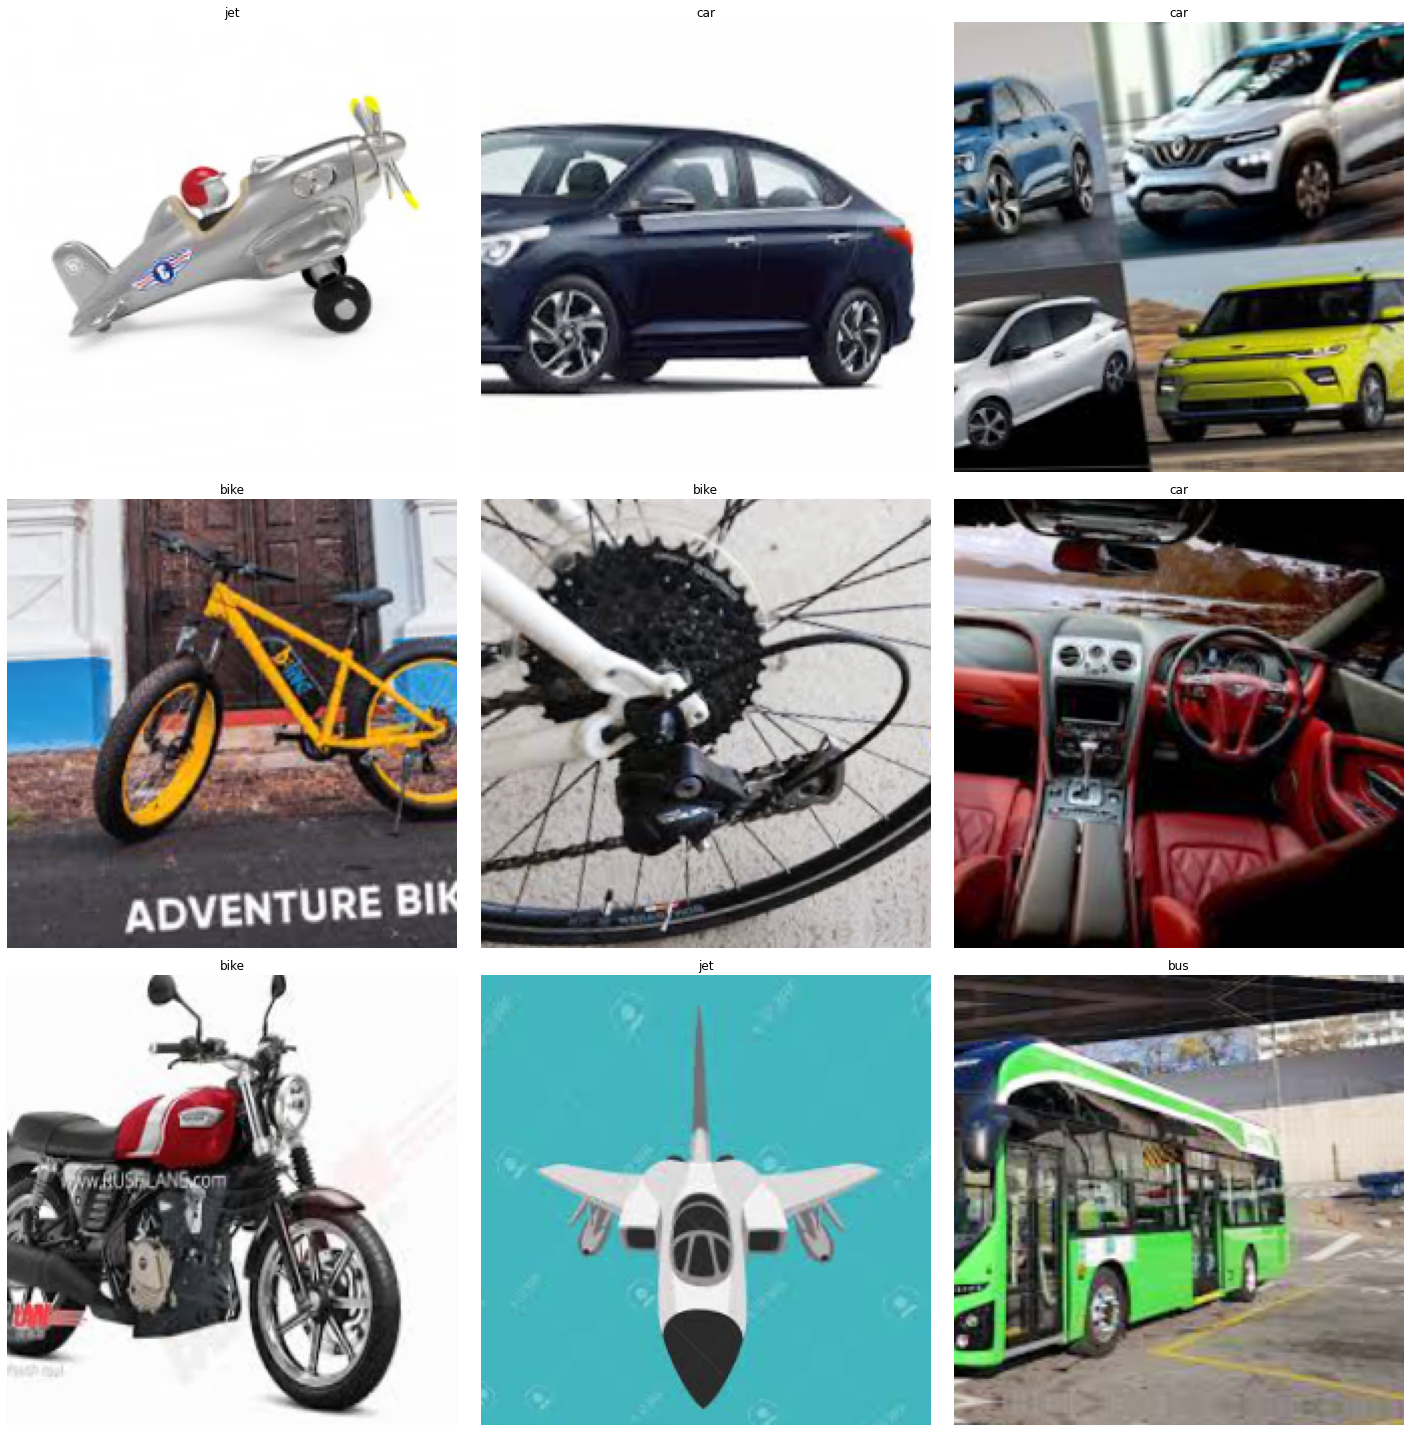

In [ ]:
data.show_batch(rows=3,figsize=(20,20))

Defining our Machine learning model on which we will train our dataset.We will use resnet 50 model since it works better than all other models almost every time.

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


Training our resnet 50 on our dataset 4 times.You can train your model any number of times till you are finding an increase in accuracy(but be aware of the over fitting case) but I have selected the number 4 because our Engineering is Completed in 4 years(Exceptions aside).

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.654949,0.275242,0.920415,00:26
1,0.398493,0.333834,0.910035,00:25
2,0.291865,0.250107,0.932526,00:25
3,0.213553,0.232420,0.930796,00:25


Mounting our google drive because we have to save our current progress and our machine learning model here.In the next few steps we have done the same thing ,nothing special. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
os.makedirs("/content/drive/My Drive/dl_projects/vehicle_detection",exist_ok=True)
dir = "/content/drive/My Drive/dl_projects/vehicle_detection"

In [ ]:
learn.save(dir+"/Stage-1")

In [ ]:
dir = "/content/drive/My Drive/dl_projects/vehicle_detection"
learn.load(dir + "/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (2316 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
car,car,car,car,car
Path: /content/My_data;

Valid: LabelList (578 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
jet,jet,jet,tractor,tractor
Path: /content/My_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 

In [ ]:
learn.export(dir+"/export.pkl")

In [ ]:
dir = "/content/drive/My Drive/dl_projects/vehicle_detection"
!pip install -U kora
from kora.drive import upload_public
url = upload_public(dir+"/export.pkl")
url

'https://drive.google.com/uc?id=1mixxU8HAMN6PcvO9o8NFjXcoumc-w8_T'